### ASSDM之总流程

#### 1.提取高层特征
---

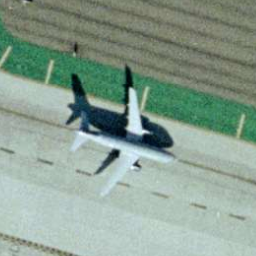

In [3]:
from features.highLevelFeature.highLevelFeature import highLevelFeature
from PIL import Image
path = 'data/Images/airplane/airplane01.tif'
Image.open(path)

In [4]:
highLevelFeature.highLevelFeature(path,modelPath='features/highLevelFeature/test.pth').size

data/Images/airplane/airplane01.tif


4096